#### EXPLORING THE ANSWERS PICKLE

In [ ]:
import pandas

In [33]:
mhug_answers = pandas.read_pickle("mhug/vqa-mhug_answers.pickle")

In [35]:
(mhug_answers.head())
# print("indices ",mhug_answers.index.names)


answer  accuracy
question_id participant_id                   
1000004     33                    1       1.0
            31                    2       0.0
            32                noone       0.0
100081006   1               frisbee       1.0
            2               frisbee       1.0

##### 'question_id', 'participant_id' are the tuples to identify the rows uniquely

In [9]:
mhug_answers.columns

Index(['answer', 'accuracy'], dtype='object')

In [ ]:
mhug_answers.iloc[[2]]  # single brackets are enough, but double brackets are needed to get a dataframe instead of a series, and when DF is 
# received, jupypter prints the table.

,,answer,accuracy
question_id,participant_id,,
1000004,32,noone,0.0


In [37]:
mhug_answers.iloc[-5:-1]

answer  accuracy
question_id participant_id                 
99645003    29                 no       1.0
            30                 no       1.0
99961002    39               wood       1.0
            37               wood       1.0

In [40]:
mhug_answers.iloc[100:110]

answer  accuracy
question_id participant_id                    
104801011   31                   yes       0.0
            33                    dk       0.0
105052024   23                   yes       1.0
            24                   yes       1.0
            22                   yes       1.0
105052043   12                    dk       0.0
            10              maryland       0.0
            11                states       0.0
105291007   22                 white       1.0
            23                 white       1.0

In [14]:
mhug_answers.iloc[-10:-1]

answer  accuracy
question_id participant_id                 
99540000    4                  dk       0.0
99546005    22                yes       1.0
            23                yes       1.0
            24                yes       1.0
99645003    28                 no       1.0
            29                 no       1.0
            30                 no       1.0
99961002    39               wood       1.0
            37               wood       1.0

In [41]:
#  total rows are
print("total rows ",len(mhug_answers))
# 3990 images and 11970 are the total number of question-answer pairs. Each image has 3 question-answer pairs.

total rows  11970


#### EXPLORING THE bboxes PICKLE

In [ ]:
mhug_bboxes = pandas.read_pickle("mhug/vqa-mhug_bboxes.pickle")

In [44]:
mhug_bboxes.head()
# print("indices ",mhug_bboxes.index.names)

,token,ymin,xmin,ymax,xmax
question_id,,,,,
1000004,TXT,210.0,200.0,870.0,1720.0
1000004,IMG,210.0,520.0,870.0,1400.0
1000004,How,487.5,634.5,592.5,718.5
1000004,many,487.5,718.5,592.5,823.5
1000004,people,487.5,823.5,592.5,970.5


In [45]:
mhug_bboxes.columns

Index(['token', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')

In [46]:
mhug_bboxes.iloc[:24]

,token,ymin,xmin,ymax,xmax
question_id,,,,,
1000004,TXT,210.0,200.0,870.0,1720.0
1000004,IMG,210.0,520.0,870.0,1400.0
1000004,How,487.5,634.5,592.5,718.5
1000004,many,487.5,718.5,592.5,823.5
1000004,people,487.5,823.5,592.5,970.5
1000004,have,487.5,970.5,592.5,1075.5
1000004,a,487.5,1075.5,592.5,1117.5
1000004,camera?,487.5,1117.5,592.5,1285.5
100081006,TXT,210.0,200.0,870.0,1720.0


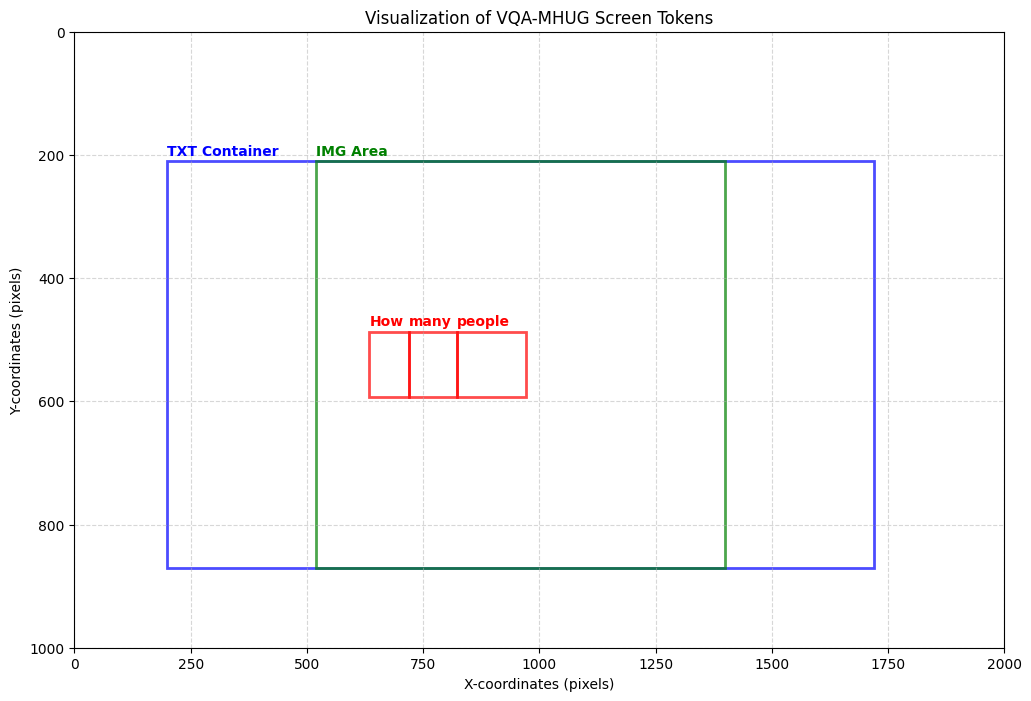

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure representing a typical screen/canvas size
fig, ax = plt.subplots(figsize=(12, 8))

# Define the bounding boxes from your data
# [ymin, xmin, ymax, xmax, label, color]
boxes = [
    [210.0, 200.0, 870.0, 1720.0, 'TXT Container', 'blue'],
    [210.0, 520.0, 870.0, 1400.0, 'IMG Area', 'green'],
    [487.5, 634.5, 592.5, 718.5, 'How', 'red'],
    [487.5, 718.5, 592.5, 823.5, 'many', 'red'],
    [487.5, 823.5, 592.5, 970.5, 'people', 'red'],
]

for ymin, xmin, ymax, xmax, label, color in boxes:
    # Calculate width and height
    width = xmax - xmin
    height = ymax - ymin
    
    # Add rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, 
                             linewidth=2, edgecolor=color, facecolor='none', alpha=0.7)
    ax.add_patch(rect)
    plt.text(xmin, ymin - 10, label, color=color, fontsize=10, fontweight='bold')

# Setting display limits based on your xmax values
plt.xlim(0, 2000)
plt.ylim(1000, 0) # Inverted Y-axis to match screen coordinates
plt.title("Visualization of VQA-MHUG Screen Tokens")
plt.xlabel("X-coordinates (pixels)")
plt.ylabel("Y-coordinates (pixels)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### text and Image were shown one after another, hence the overlap

#### EXPLORING GAZE PICKLE  

In [2]:
mhug_gaze = pandas.read_pickle("mhug/vqa-mhug_gaze.pickle")

In [47]:
mhug_gaze.iloc[:1]
# print("indices ",mhug_gaze.index.names)

,,,eye,start,end,duration,x,y,pupil,ppd_x,ppd_y,plate,time_since_plate_onset,trial_id,accurate_eye
question_id,participant_id,fix_idx,,,,,,,,,,,,,
1000004,31,1,R,3884515.0,3884694.0,179.0,960,580,462.0,58.1,58.7,centerfix,126.0,248,L


In [11]:
mhug_gaze.iloc[:40]

eye      start        end  duration     x  \
question_id participant_id fix_idx                                             
1000004     31             1         R  3884515.0  3884694.0     179.0   960   
                           2         L  3884524.0  3884695.0     171.0   931   
                           3         L  3884725.0  3884948.0     223.0   829   
                           4         R  3884724.0  3884948.0     224.0   847   
                           5         R  3884974.0  3885186.0     212.0   748   
                           6         L  3884973.0  3885187.0     214.0   732   
                           7         L  3885222.0  3885447.0     225.0   954   
                           8         R  3885223.0  3885449.0     226.0   979   
                           9         R  3885482.0  3885670.0     188.0  1162   
                           10        L  3885486.0  3885671.0     185.0  1128   
                           11        R  3885703.0  3885957.0     254.0  1025   
                           12        L  3885705.0  3885957.0     252.0  1014   
                           13        L  3886126.0  3886447.0     321.0   924   
                           14        R  3886129.0  3886450.0     321.0   952   
                           15        R  3886483.0  3886636.0     153.0  1081   
                           16        L  3886472.0  3886638.0     166.0  1051   
                           17        L  3886657.0  3886772.0     115.0   987   
                           18        R  3886656.0  3886772.0     116.0  1002   
                           19        L  3886798.0  3886989.0     191.0   854   
                           20        R  3886799.0  3886989.0     190.0   880   
                           21        R  3887005.0  3887786.0     781.0   930   
                           22        L  3887004.0  3887787.0     783.0   899   
                           23        L  3887806.0  3887964.0     158.0   847   
                           24        R  3887805.0  3887964.0     159.0   890   
                           25        R  3887987.0  3888144.0     157.0   799   
                           26        L  3887987.0  3888145.0     158.0   750   
                           27        L  3888192.0  3888327.0     135.0   551   
                           28        R  3888192.0  3888330.0     138.0   583   
                           29        L  3888349.0  3888574.0     225.0   606   
                           30        R  3888351.0  3888577.0     226.0   641   
                           31        R  3888594.0  3888857.0     263.0   698   
                           32        L  3888596.0  3888858.0     262.0   676   
                           33        R  3888892.0  3889048.0     156.0   884   
                           34        L  3888894.0  3889049.0     155.0   860   
                           35        L  3889058.0  3889222.0     164.0   858   
                           36        R  3889059.0  3889224.0     165.0   890   
                           37        L  3889243.0  3889671.0     428.0   912   
                           38        R  3889242.0  3889671.0     429.0   939   
                           39        L  3889682.0  3889916.0     234.0   882   
                           40        R  3889681.0  3889917.0     236.0   910   

                                      y  pupil  ppd_x  ppd_y      plate  \
question_id participant_id fix_idx                                        
1000004     31             1        580  462.0  58.10  58.70  centerfix   
                           2        574  474.0  58.10  58.80  centerfix   
                           3        549  515.0  58.15  58.80  centerfix   
                           4        553  492.0  58.15  58.80  centerfix   
                           5        548  469.0  58.30  58.90   txtplate   
                           6        553  484.0  58.30  58.85   txtplate   
                           7        529  452.0  58.10  58.70   txtplate   